# Huber Regressor

* Handles outliers by assigning them less weight during model fit
* Uses epsilon hyperparameter that controls the number of samples classified as outliers
* Small epsilon, more robust to outliers

In [1]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### Create regression dataset

In [2]:
rng = np.random.RandomState(0)
X, y, coef = make_regression(
    n_samples=200,
    n_features=2,
    noise=4.0,
    coef=True,
    random_state=0
)

# Set first 4 data points as outliers
X[:4] = rng.uniform(10, 20, (4, 2))
y[:4] = rng.uniform(10, 20, 4)

### Fit the data

* Use Huber Regressor
* Use Linear Regressor (for comparison)

In [3]:
huber = HuberRegressor().fit(X, y)
linear = LinearRegression().fit(X, y)

huber_coef = huber.coef_ * X + huber.intercept_
linear_coef = linear.coef_ * X + linear.intercept_

### Line of best fit

* Linear Regression is skewed by outliers
* Huber Regression is not as influenced by outliers

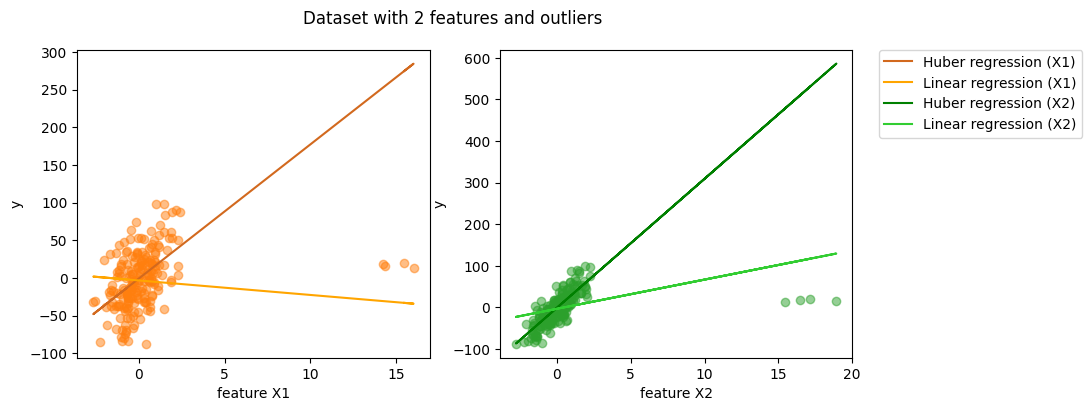

In [4]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dataset with 2 features and outliers')
ax1.set(xlabel='feature X1', ylabel='y')
ax2.set(xlabel='feature X2', ylabel='y')

# Datapoints
ax1.scatter(X[:, 0], y, alpha=0.5, c='tab:orange')
ax2.scatter(X[:, 1], y, alpha=0.5, c='tab:green')

# Best fit line
ax1.plot(X[:, 0], huber_coef[:, 0], color='chocolate', label="Huber regression (X1)")
ax1.plot(X[:, 0], linear_coef[:, 0], color='orange', label="Linear regression (X1)")
ax2.plot(X[:, 1], huber_coef[:, 1], color='green', label="Huber regression (X2)")
ax2.plot(X[:, 1], linear_coef[:, 1], color='limegreen', label="Linear regression (X2)")
fig.legend(bbox_to_anchor=(1.13, 0.88), borderaxespad=0)
plt.show()